In [1]:
"""
################################################################################################################################

This is a project to test out different volatility models based on a GBM simulation.
Will also try to model the volatility futures curves using real SPX data, and compare with the shape of VX futures
Part 1: GBM simulations
Part 2: Real data test

################################################################################################################################
"""

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Part 1.1 Setting things up. Create simulation path function, same as the one from trade execution optimization

# stock path generator function
def stock_path_generator(r, sigma, T, N, steps, S0=100, seed=1): 
    """
    input: 
    r: interest rate
    sigma: volatility
    T: total time
    N: number of paths
    steps: number of steps of each path
    
    output:
    simulated stock paths
    """
    dt = float(T)/steps
    paths = np.zeros((steps+1, N), np.float64)
    paths[0] = S0
    np.random.seed(seed)
    for i in range(1, steps+1):
        rand = np.random.standard_normal(N)
        paths[i] = paths[i-1] * np.exp((r - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*rand)
    return paths

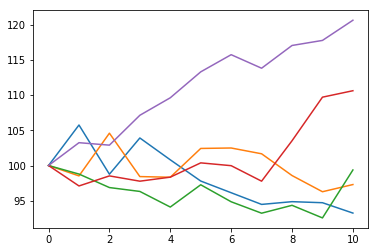

array([0.03544513, 0.0327482 , 0.0294184 , 0.0278619 , 0.01698936])

In [35]:
r = .05
sigma = .1
T = 1
N = 5
steps = 10
sample_paths = stock_path_generator(r, sigma, T, N, steps, S0=100, seed = 1)
plt.plot(sample_paths)
plt.show()
sample_paths[0:2].mean()
log_rets = np.diff(np.log(sample_paths), axis = 0)
np.std(log_rets[0:10], axis = 0)

In [36]:
# Part 1.2 Volatility models (using ones from MIT Topics in Mathematics with Applications in Finance as a start)

# model 1: simple historical volatility on a rolling period
def historical_vol(paths, rolling_window):
    """
    model:
    sigma = sqrt(var(R))
    
    input: 
    paths:paths generated by function stock_path_generator, type: np.ndarray
    rolling_window: rolling window within which the volatility is calculated
    
    output:
    volatility paths in the form of np.ndarray
    """
    log_rets = np.diff(np.log(paths), axis = 0)
    steps, num_of_paths = log_rets.shape
    vol_steps = steps-rolling_window
    volatilities = np.zeros((vol_steps, num_of_paths), np.float64)
    for i in range(vol_steps):
        volatilities[i] = np.std(log_rets[i:i+rolling_window], axis = 0)
    return volatilities

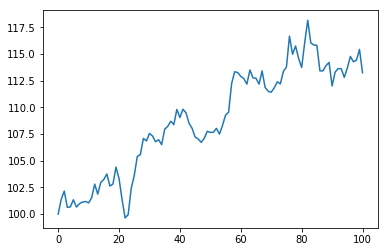

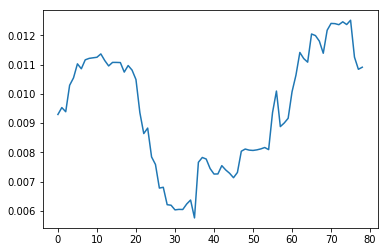

In [57]:
r = .05
sigma = .1
T = 1
dt = .01
N = 1
steps = int(T/dt)
sample_paths = stock_path_generator(r, sigma, T, N, steps, S0=100, seed = 10)
plt.plot(sample_paths)
plt.show()

vols = historical_vol(sample_paths, 21)
plt.plot(vols)
plt.show()